In [1]:
import sys
import os
import importlib
# columnar analysis
from coffea import processor
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

The code below uses samples that all have the same masses/energy but different displacements. This serves to analyze the effect of a different displacement on the 4 plots

In [2]:
samples1 = [
    "2Mu2E_1000GeV_0p25GeV_0p002mm",
    "2Mu2E_1000GeV_0p25GeV_0p02mm",
    "2Mu2E_1000GeV_0p25GeV_0p2mm",
    "2Mu2E_1000GeV_0p25GeV_1mm",
    "2Mu2E_1000GeV_0p25GeV_2mm"
    
]

samples=samples1
fileset = utilities.make_fileset(samples, "ffntuple_v4")

runner = processor.Runner(
    #executor=processor.IterativeExecutor(),
    executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
    #maxchunks=1,
)

channels = [
    "pvAndCosmic_cuts",
    "baseNoLj",
    "base"
    
]
p = sidm_processor.SidmProcessor(
    channels,
    ["photon_id"],
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)
out = output["out"]

Output()

Output()

Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  pvAndCos

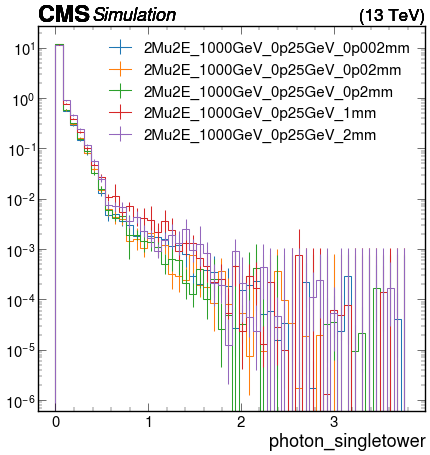

In [3]:
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon_singletower"][channels[0], :], density=True, flow=None, label=sample)
plt.legend()
plt.yscale('log')

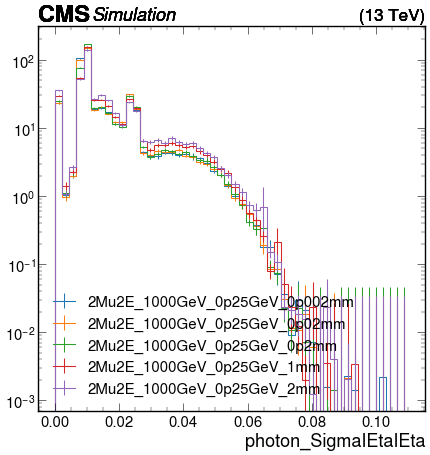

In [4]:
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon_SigmaIEtaIEta"][channels[0], :], density=True, flow=None, label=sample)
plt.yscale('log')
plt.legend()

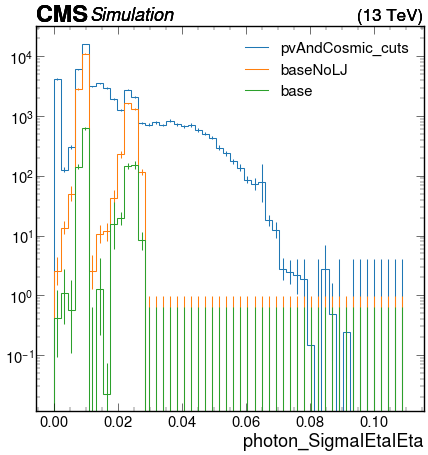

In [13]:
for channel in channels:
    utilities.plot(out[sample]["hists"]["photon_SigmaIEtaIEta"][channel, :])
plt.yscale("log")
plt.legend(["pvAndCosmic_cuts", "baseNoLJ", "base"])

This took so long. I don't even know if it's useful, but the overwhelming pride is worth it.
I don't even know what these channels do, I think they're progressively tighter cuts.

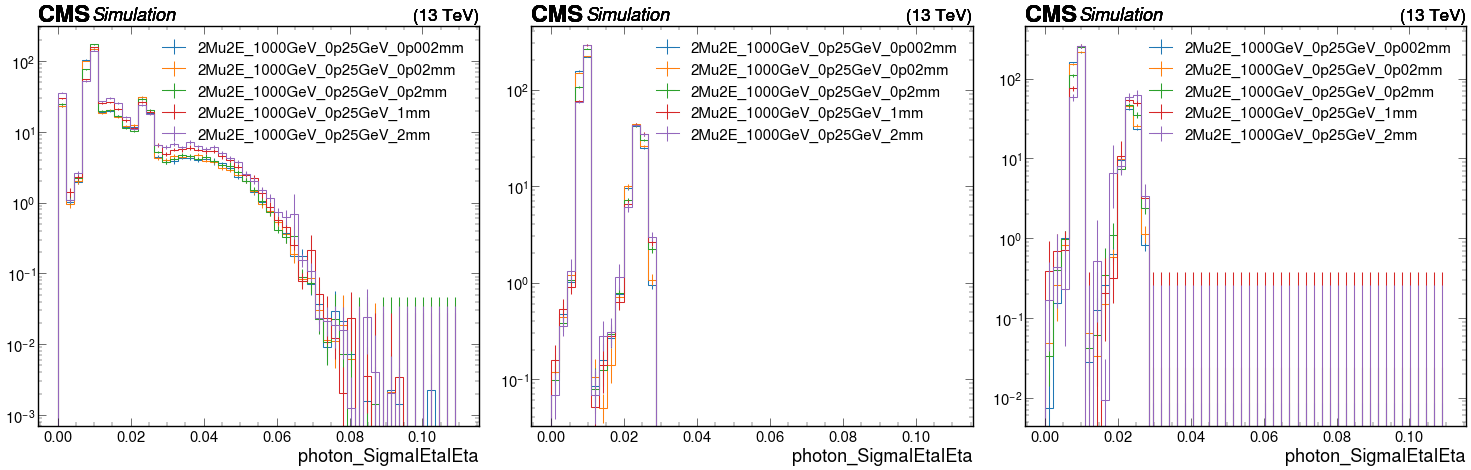

In [19]:
plt.subplots(1, 3, figsize=(30, 10))
plt.subplot(1, 3, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon_SigmaIEtaIEta"]["pvAndCosmic_cuts", :], density=True, flow=None, label=sample)
plt.legend()
plt.yscale("log")

plt.subplot(1, 3, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon_SigmaIEtaIEta"]["baseNoLj", :], density=True, flow=None, label=sample)
plt.legend()
plt.yscale("log")

plt.subplot(1, 3, 3)
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon_SigmaIEtaIEta"]["base", :], density=True, flow=None, label=sample)
plt.legend()
plt.yscale("log")

plt.tight_layout()

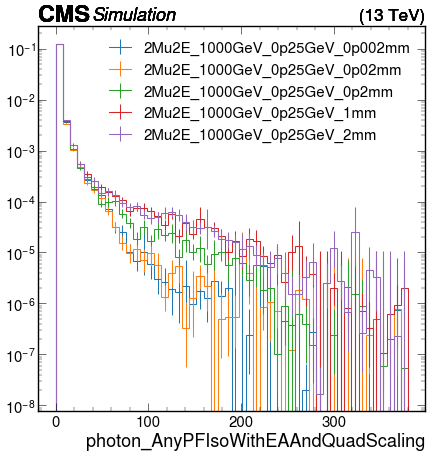

In [7]:
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon_AnyPFIsoWithEAAndQuadScaling"][channels[0], :], density=True, flow=None, label=sample)
plt.legend()
plt.yscale('log')

In [8]:
utilities.plot(out["2Mu2E_100GeV_1p2GeV_9p6mm"]["hists"]["photon_AnyPFIsoWithEACut"][channels[0], :], density=True)

KeyError: '2Mu2E_100GeV_1p2GeV_9p6mm'

AnyPFIsoWithEA doesn't work

In [20]:
print(channels[1])

baseNoLj
